In [33]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Part B:  To create an image dataset to be used by AI team build an image classifier data

This Python script performs face detection on images stored in the training_images folder using OpenCV’s Haar Cascade Classifier. It detects faces, stores metadata (face positions and count), and saves processed images with marked faces.



In [29]:
# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Loads Haar Cascade model (haarcascade_frontalface_default.xml) for detecting frontal faces.
# OpenCV provides this pre-trained model, making it easy to detect faces without training a custom model.


In [30]:
# Directory containing training images
image_folder = 'training_images'


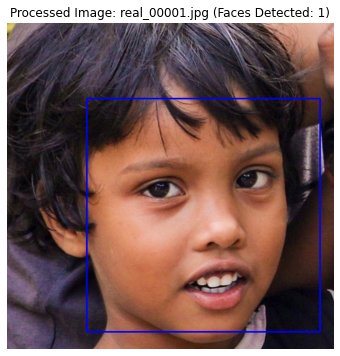

In [31]:
# List to store metadata
face_metadata = []

# Flag to display only one image
displayed = False

# Read images from folder
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    image = cv2.imread(image_path)
    
    if image is not None:
        # Haar Cascade works better on grayscale images, so the image is converted from BGR (color) to grayscale.
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        # detectMultiScale(): detects multiple faces in the image.
        # Parameters Explained: scaleFactor=1.1: Scales the image by 10% in each iteration to detect faces at different sizes.
                               # minNeighbors=5: Ensures that at least 5 nearby rectangles are grouped to confirm a face.
                               # minSize=(30, 30): Minimum size for a detected face.

        
        # Store the total number of faces detected
        total_faces = len(faces)
        
        for (x, y, w, h) in faces:
            face_metadata.append({'x': x, 'y': y, 'width': w, 'height': h, 'total_faces': total_faces,'image_name': image_name})
            # Metadata stored for each detected face: (x, y): Top-left corner of the face bounding box, width, height: Size of the detected face, total_faces: Number of faces detected in the image, image_name: Name of the image file.
            
        # Draw rectangle around faces (optional for visualization)
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
            # Draws blue rectangles around detected faces using cv2.rectangle().
            # Parameters: (x, y): Top-left corner, (x + w, y + h): Bottom-right corner, (255, 0, 0): Blue color (BGR format), 2: Line thickness.

        
        
         # Display only the first processed image
        if not displayed and total_faces > 0:
            # Convert BGR to RGB for Matplotlib
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Display the image
            plt.figure(figsize=(6, 6))
            plt.imshow(image_rgb)
            plt.axis('off')  # Hide axes
            plt.title(f"Processed Image: {image_name} (Faces Detected: {total_faces})")
            plt.show()

            displayed = True  # Set flag to True so no more images are displayed
        
        
        
        # Save processed images (optional)
        cv2.imwrite(f'processed_{image_name}', image)


In [32]:
    # Convert metadata to DataFrame
df = pd.DataFrame(face_metadata)
print(df.head())

# Save to CSV
df.to_csv('face_metadata.csv', index=False)

print("\n Face detection completed and metadata saved.")

     x    y  width  height  total_faces      image_name
0  146  140    428     428            1  real_00001.jpg
1   80  140    436     436            1  real_00002.jpg
2   33  121    362     362            1  real_00003.jpg
3  134  173    356     356            1  real_00004.jpg
4   61   62    472     472            1  real_00006.jpg

 Face detection completed and metadata saved.
